In [2]:
!pip install tensorflow

Defaulting to user installation because normal site-packages is not writeable
     -------------------------------------- 276.5/276.5 MB 4.2 MB/s eta 0:00:00
     -------------------------------------- 440.8/440.8 kB 5.5 MB/s eta 0:00:00
     ---------------------------------------- 57.5/57.5 kB ? eta 0:00:00
     ---------------------------------------- 5.6/5.6 MB 5.9 MB/s eta 0:00:00
     ---------------------------------------- 4.2/4.2 MB 6.2 MB/s eta 0:00:00
     ---------------------------------------- 24.4/24.4 MB 7.2 MB/s eta 0:00:00
     -------------------------------------- 126.5/126.5 kB 7.3 MB/s eta 0:00:00
     ---------------------------------------- 65.5/65.5 kB ? eta 0:00:00
     ---------------------------------------- 14.9/14.9 MB 8.1 MB/s eta 0:00:00
     -------------------------------------- 422.5/422.5 kB 8.8 MB/s eta 0:00:00
     ---------------------------------------- 1.5/1.5 MB 8.6 MB/s eta 0:00:00
     ---------------------------------------- 1.7/1.7 MB 8.3 M

  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
daal4py 2021.6.0 requires daal==2021.4.0, which is not installed.
ydata-profiling 4.1.2 requires numpy<1.24,>=1.16.0, but you have numpy 1.24.3 which is incompatible.
numba 0.55.1 requires numpy<1.22,>=1.18, but you have numpy 1.24.3 which is in

In [11]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import numpy as np
from tensorflow.keras import layers

In [9]:
# Завантаження та підготовка даних
(x_train, y_train), (x_test, y_test) = keras.datasets.fashion_mnist.load_data()
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

In [12]:
# Створення архітектури нейромережі
model = keras.Sequential([
    layers.Flatten(input_shape=(28, 28)),
    layers.Dense(128, activation='relu'),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

In [13]:
# Компіляція моделі
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [14]:
# Тренування моделі
model.fit(x_train, y_train, epochs=10, batch_size=64, validation_data=(x_test, y_test))

Epoch 1/10
938/938 [==============================] - 2s 2ms/step - loss: 0.5181 - accuracy: 0.8173 - val_loss: 0.4660 - val_accuracy: 0.8306
Epoch 2/10
938/938 [==============================] - 1s 1ms/step - loss: 0.3799 - accuracy: 0.8637 - val_loss: 0.3827 - val_accuracy: 0.8613
Epoch 3/10
938/938 [==============================] - 1s 1ms/step - loss: 0.3405 - accuracy: 0.8754 - val_loss: 0.3700 - val_accuracy: 0.8635
Epoch 4/10
938/938 [==============================] - 1s 1ms/step - loss: 0.3167 - accuracy: 0.8830 - val_loss: 0.3791 - val_accuracy: 0.8632
Epoch 5/10
938/938 [==============================] - 1s 1ms/step - loss: 0.2962 - accuracy: 0.8905 - val_loss: 0.3739 - val_accuracy: 0.8673
Epoch 6/10
938/938 [==============================] - 1s 1ms/step - loss: 0.2842 - accuracy: 0.8942 - val_loss: 0.3513 - val_accuracy: 0.8714
Epoch 7/10
938/938 [==============================] - 1s 1ms/step - loss: 0.2702 - accuracy: 0.8996 - val_loss: 0.3296 - val_accuracy: 0.8772
Epoch 

In [15]:
# Оцінка моделі
loss, accuracy = model.evaluate(x_test, y_test)
print('Test Loss:', loss)
print('Test Accuracy:', accuracy)

313/313 [==============================] - 0s 720us/step - loss: 0.3412 - accuracy: 0.8846
Test Loss: 0.34124380350112915
Test Accuracy: 0.8845999836921692


313/313 [==============================] - 0s 635us/step


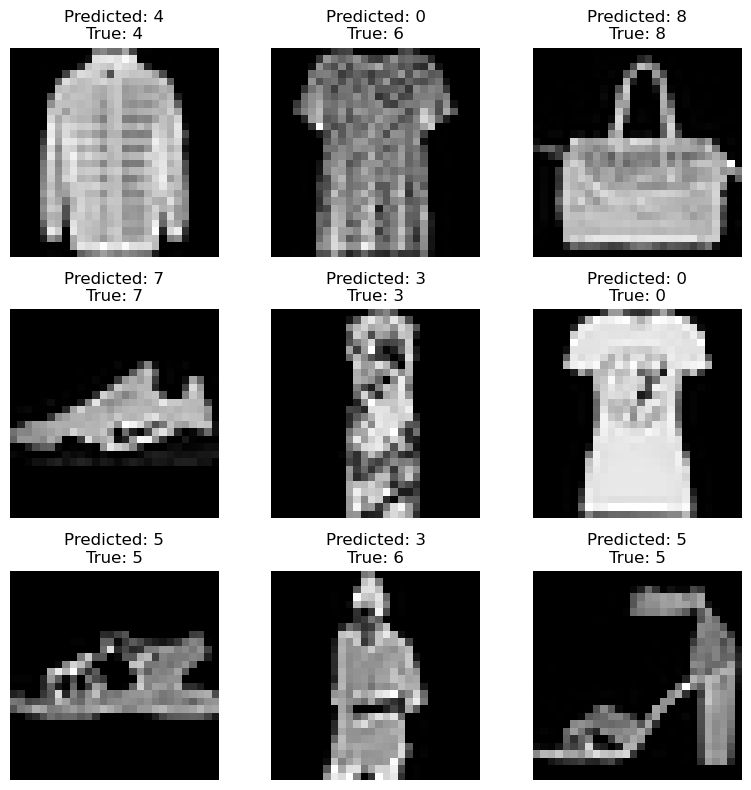

In [16]:
# Отримання передбачених міток для тестових даних
predictions = model.predict(x_test)
predicted_labels = np.argmax(predictions, axis=1)

# Випадковий вибір кількох прикладів для візуалізації
random_indexes = np.random.choice(range(len(x_test)), size=9, replace=False)

# Візуалізація зображень разом з передбаченими та правильними мітками класів
fig, axes = plt.subplots(3, 3, figsize=(8, 8))
for i, ax in enumerate(axes.flat):
    ax.imshow(x_test[random_indexes[i]], cmap='gray')
    ax.axis('off')
    ax.set_title(f"Predicted: {predicted_labels[random_indexes[i]]}\nTrue: {y_test[random_indexes[i]]}")
plt.tight_layout()
plt.show()